In [6]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import heapq
import queue

In [7]:
def euclidean_distance(pos, node1, node2):
    x1, y1 = pos[node1]
    x2, y2 = pos[node2]
    return np.sqrt((x1 - x2) ** 2 + (y1 - y2) ** 2)

In [8]:
def best_first_search(G, start, goal, heuristics):
    priority_queue = queue.PriorityQueue()
    priority_queue.put((heuristics[start], start))
    visited = set()
    path = []
    
    while not priority_queue.empty():
        heuristic_value, current = priority_queue.get()  # heuristic_value is unused but necessary for priority queue structure
        
        if current in visited:
            continue
        
        path.append(current)
        visited.add(current)
        
        if current == goal:
            return path
        
        for neighbor in G.neighbors(current):
            if neighbor not in visited:
                priority_queue.put((heuristics[neighbor], neighbor))
    
    return []  # Return empty if no path found

In [9]:
def draw_graph(goal):
    # Create a graph
    G = nx.Graph()
    
    # Define nodes
    nodes = ['A', 'B', 'C', 'D', 'E', 'F']
    G.add_nodes_from(nodes)
    
    # Define edges with weights
    edges = [('A', 'B', 3), ('A', 'C', 2), ('B', 'D', 4), ('C', 'E', 5), ('D', 'F', 1), ('E', 'F', 2), ('B', 'E', 3)]
    G.add_weighted_edges_from(edges)
    
    # Compute the spring layout
    pos = nx.spring_layout(G)
    
    # Calculate heuristics (Euclidean distances to goal node) and store in a table
    heuristics = {node: euclidean_distance(pos, node, goal) for node in nodes}
    
    # Print heuristic table
    print(f"Heuristic Table (Euclidean distance to node {goal}):")
    for node, h_value in heuristics.items():
        print(f"Node {node}: {h_value:.2f}")
    
    # Perform Best-First Search
    start_node = 'A'
    path = best_first_search(G, start_node, goal, heuristics)
    print("Best-First Search Path:", path)
    
    # Extract edge weights for labeling
    edge_labels = {(u, v): f"{d['weight']}" for u, v, d in G.edges(data=True)}
    
    # Draw the graph
    plt.figure(figsize=(6, 6))
    nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray', node_size=1500, font_size=12)
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=10, font_color='red')
    
    # Highlight the best-first search path
    if path:
        path_edges = [(path[i], path[i+1]) for i in range(len(path)-1)]
        nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color='blue', width=2)
    
    # Show the plot
    plt.show()

Heuristic Table (Euclidean distance to node F):
Node A: 1.90
Node B: 1.25
Node C: 1.59
Node D: 1.04
Node E: 0.94
Node F: 0.00
Best-First Search Path: ['A', 'B', 'E', 'F']


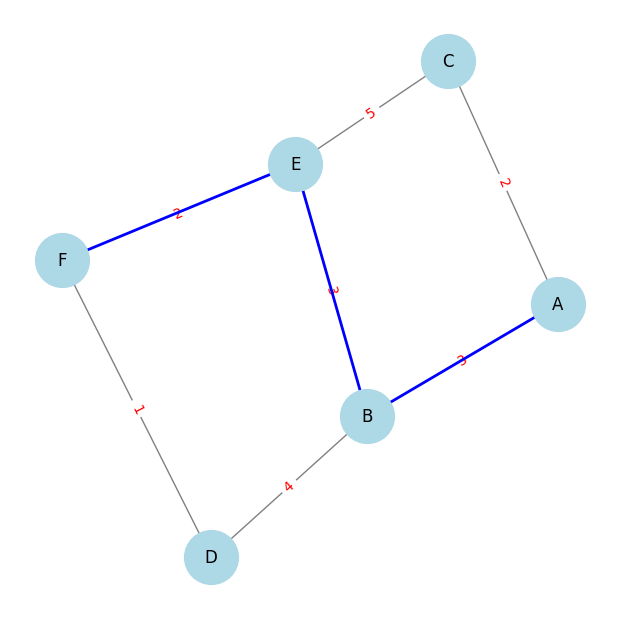

In [10]:
# Define goal node
goal_node = 'F'

# Call the function to draw the graph
draw_graph(goal_node)